# <center><font color='blue'>Regresión Lineal</font></center>

## 1. Introducción

La regresión lineal es uno de los algoritmos más conocidos desarrollado en el campo de la estadística. Se utiliza como un modelo para comprender la relación entre las variables numéricas de entrada y salida. Es tanto un algoritmo estadístico como un algoritmo de aprendizaje automático.

La regresión lineal es un modelo lineal, es decir, un modelo que asume una relación lineal entre las variables de entrada $x$ y la variable de salida única $y$. Más específicamente, asume que $y$ se puede calcular a partir de una combinación lineal de las variables de entrada $x$.

![Imagen regresión lineal](imagenes/regresion_lineal.png)

## 2. Breve historia

La primera forma de regresión fue el método de mínimos cuadrados publicado por Legendre en 1805 y por Gauss en 1809.  Legendre y Gauss aplicaron el método para determinar, a partir de observaciones astronómicas, las órbitas de los cuerpos alrededor del sol (principalmente cometas, pero también más tarde los entonces recién descubiertos planetas menores). Gauss publicó un desarrollo posterior de la teoría de los mínimos cuadrados en 1821, incluyendo una versión del teorema de Gauss-Markov.

El término "regresión" fue acuñado por Francis Galton en el siglo XIX para describir un fenómeno biológico. El fenómeno fue que las alturas de los descendientes de ancestros altos tienden a regresar hacia abajo, hacia un promedio normal (un fenómeno conocido como regresión hacia la media ). Para Galton, la regresión sólo tenía este significado biológico, pero su trabajo fue extendido más tarde por Udny Yule y Karl Pearson a un contexto estadístico más general. 

## 3. Planteamiento del algoritmo

![Imagen regresion_lineal](https://bookdown.org/sbikienga/Intro_to_stat_book/images/chap7/ols.jpg)

Dado un vector de entradas $ X^{T} = (X_{1}, X_{2}, ..., X_{p}) $ se desea predecir el valor de la variable de salida $Y$ a través del modelo

$$ \hat{Y} = \hat\beta_{0} + \sum \limits_{j=1} ^{p} X_{j}\hat\beta_{j} $$

en donde los $\hat\beta_j$ son parámetros o coeficiones desconocidos y las variables $X_j$ pueden ser de diferentes fuentes como:

* Entradas cuantitativas
* Transformaciones de entradas cuantitativas tales como logaritmos.
* Representaciones polinomiales
* Transformación de variables cualitativas en variables numpericas o dummy
* Interacciones entre variables como por ejemplo $X_3 = X_1 · X_2 $

Cómo se ajusta el modelo lineal a un conjunto de datos de entrenamiento?  Existen muchos métodos pero el más popular es el de los mínimos cuadrados.  En este enfoque, se eligen los coeficientes $\beta$ que minimicen la suma de los cuadrados de la diferencia de la predicción con la realidad (Residual Sum of Squares)

$$RSS(\beta) = \sum\limits_{i=1} ^{N} (y_i - x_i^T\beta)^2 $$

RSS($\beta$) es una función cuadrática y por lo tanto su mínimo siempre existe pero puede no ser único. En notación de matriz 

$$RSS(\beta) = (y - X \beta)^T (y - X\beta) $$

en donde $X$ es una matriz N x $p$ y cada fila es un vector de entrada y $y$ es un N-vector de las salidas del conjunto de entrenamiento. Diferenciando con respecto a \beta da como resultado las ecuaciones normales

$$ X^T(y - X \beta) = 0 $$

Si $X^TX$ es no singular, entonces la única solución está dada por

$$ \hat\beta = (X^TX)^{-1}X^Ty$$

En una entrada arbitraria $x_0$ la predicción es $\hat{y}(x_0) = x_0^T\hat\beta$.

## 4. Ejemplo regresión lineal

Se empleará un conjunto de datos con información de autos usados de la marca Toyota Corolla. El objetivo es predecir el precio de los autos empleando la técnica de regresión lineal.  El conjunto de datos está disponible en https://www.kaggle.com/tolgahancepel/toyota-corolla

El conjunto de datos consta de 1.437 observaciones con las siguientes columnas:

* Age: Antiguedad en meses
* KM: Kilometraje
* FuelType: Tipo de combustible (Petrol, Diesel, CNG)
* HP: caballos de fuerza
* MetColor:Color metálico (Si=1, No=0)
* Automatic: Automatico (Si=1, No=0)
* CC: Cilindraje
* Doors: Número de puertas
* Weight: Peso
* Price: Precio.  Variable a predecir.

### Importar librerías y leer el conjunto de datos

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
autos = pd.read_csv("./ToyotaCorolla.csv")
autos.shape

(1436, 10)

In [2]:
autos.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23,46986,Diesel,90,1,0,2000,3,1165
1,13750,23,72937,Diesel,90,1,0,2000,3,1165
2,13950,24,41711,Diesel,90,1,0,2000,3,1165
3,14950,26,48000,Diesel,90,0,0,2000,3,1165
4,13750,30,38500,Diesel,90,0,0,2000,3,1170


In [3]:
autos.describe()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.674791,0.055710,1566.827994,4.033426,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.468616,0.229441,187.182436,0.952677,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,0.000000,1300.000000,2.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,0.000000,1400.000000,3.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1.000000,0.000000,1600.000000,4.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1.000000,0.000000,1600.000000,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,1.000000,2000.000000,5.000000,1615.00000


### Visualización de los datos

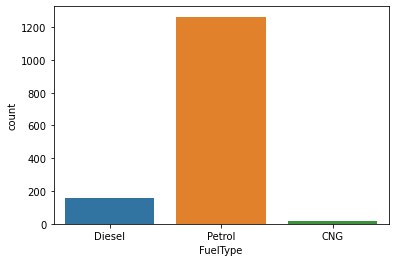

In [4]:
sb.countplot(x='FuelType',data=autos)
plt.show()

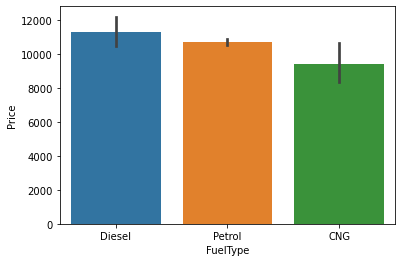

In [5]:
sb.barplot(x="FuelType",y="Price",data=autos)
plt.show()

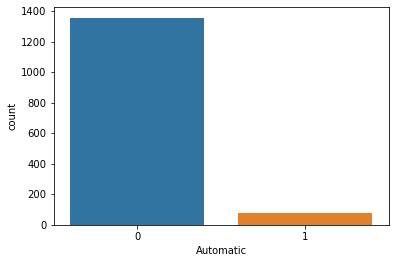

In [6]:
sb.countplot(x='Automatic',data=autos)
plt.show()

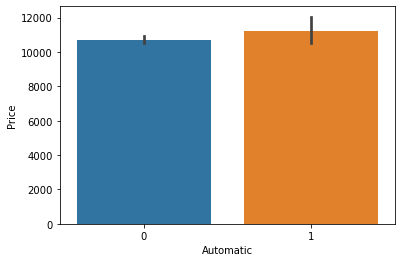

In [7]:
sb.barplot(x="Automatic",y="Price",data=autos)
plt.show()

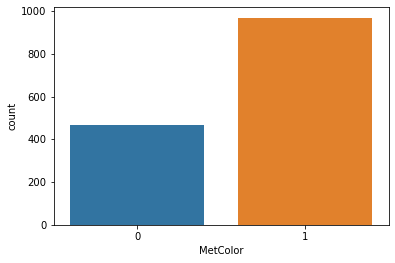

In [8]:
sb.countplot(x='MetColor',data=autos)
plt.show()

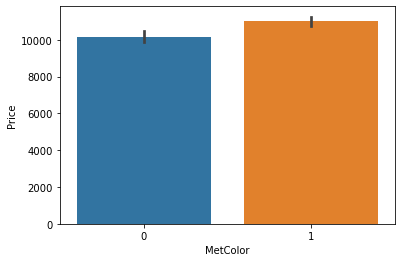

In [9]:
sb.barplot(x="MetColor",y="Price",data=autos)
plt.show()

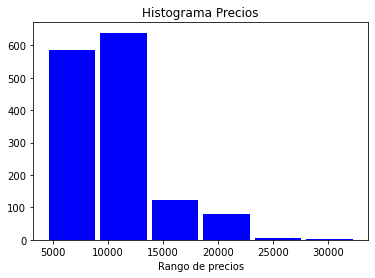

In [10]:
plt.hist(autos['Price'],rwidth=0.9,alpha=1,color='blue',bins=6) 
plt.xlabel('Rango de precios')
plt.title('Histograma Precios')
plt.show();

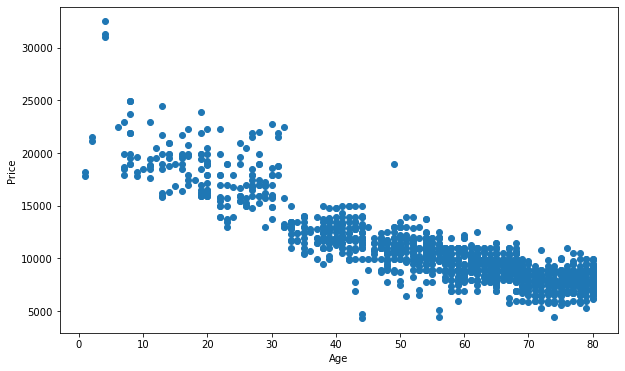

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = autos['Age'], y = autos['Price'])
plt.xlabel("Age")
plt.ylabel("Price")
plt.show()

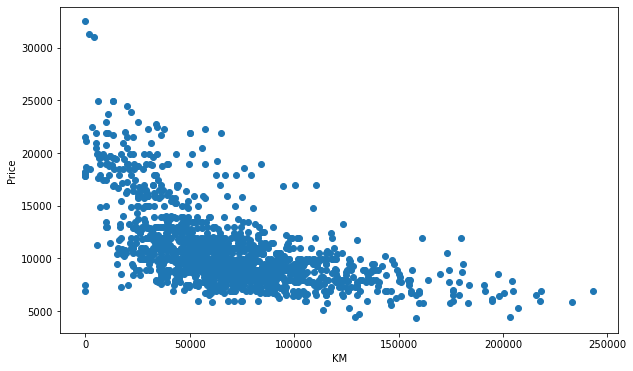

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = autos['KM'], y = autos['Price'])
plt.xlabel("KM")
plt.ylabel("Price")
plt.show()

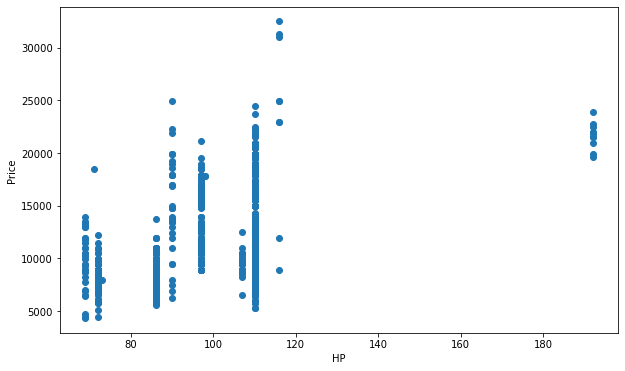

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = autos['HP'], y = autos['Price'])
plt.xlabel("HP")
plt.ylabel("Price")
plt.show()

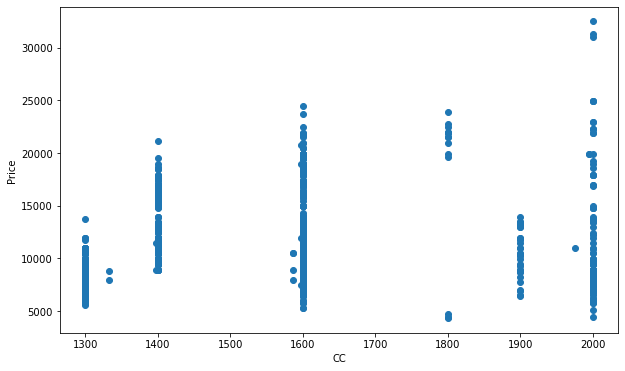

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = autos['CC'], y = autos['Price'])
plt.xlabel("CC")
plt.ylabel("Price")
plt.show()

### Preparación de los datos

La variable categórica FuelType se convierte en numérica

In [15]:
autos = pd.get_dummies(autos)
autos.head()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_CNG,FuelType_Diesel,FuelType_Petrol
0,13500,23,46986,90,1,0,2000,3,1165,0,1,0
1,13750,23,72937,90,1,0,2000,3,1165,0,1,0
2,13950,24,41711,90,1,0,2000,3,1165,0,1,0
3,14950,26,48000,90,0,0,2000,3,1165,0,1,0
4,13750,30,38500,90,0,0,2000,3,1170,0,1,0


### Modelo regresión lineal

Se almacena en una matriz X las variables empleadas para la prediccción. Se almacenan en un vector Y la variable a predecir.

In [16]:
X = autos.drop('Price', axis = 1).values
y = autos.iloc[:, 0].values.reshape(-1,1)
print("X: ", X)
print("Y: ", y)

X:  [[   23 46986    90 ...     0     1     0]
 [   23 72937    90 ...     0     1     0]
 [   24 41711    90 ...     0     1     0]
 ...
 [   71 17016    86 ...     0     0     1]
 [   70 16916    86 ...     0     0     1]
 [   76     1   110 ...     0     0     1]]
Y:  [[13500]
 [13750]
 [13950]
 ...
 [ 8500]
 [ 7250]
 [ 6950]]


Se separa el conjunto de datos en subconjuntos de entrenamiento y pruebas.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
print("Tamaño X_train: ",X_train.shape)
print("Tamaño X_test: ", X_test.shape)
print("Tamaño y_train: ",y_train.shape)
print("Tamaño y_test",y_test.shape)

Tamaño X_train:  (1148, 11)
Tamaño X_test:  (288, 11)
Tamaño y_train:  (1148, 1)
Tamaño y_test (288, 1)


Se entrena el modelo:

In [18]:
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

Se hacen las predicciones usando el modelo entrenado

In [19]:
y_pred = regr.predict(X_train)

Se revisan los coeficientes obtenidos y el intercepto

In [20]:
print('Coeficientes: \n', regr.coef_)
print('Independent term: \n', regr.intercept_)

Coeficientes: 
 [[-1.22469325e+02 -1.45110390e-02  5.24423742e+01  3.53367500e+01
   9.52387548e+01 -3.95959803e+00 -4.96783014e+01  2.49483569e+01
  -1.29626088e+03  1.31784406e+03 -2.15831864e+01]]
Independent term: 
 [-7218.78667292]


Se evalúa el modelo calculando el error cuadrático medio RMSE y el coeficiente R cuadrado

In [22]:
print("RMSE: %.2f" % np.sqrt(mean_squared_error(y_train, y_pred)))
print('Variance score: %.2f' % r2_score(y_train, y_pred))

RMSE: 1289.27
Variance score: 0.88


## 5. Referencias

1. Hastie, T., Tibshirani, R., & Friedman, J. H. (2009). The elements of statistical learning: data mining, inference, and prediction. 2nd ed. New York: Springer.
2. Linear Regression for Machine Learning.  Disponible en: [https://machinelearningmastery.com/linear-regression-for-machine-learning/](https://machinelearningmastery.com/linear-regression-for-machine-learning/)
3. Análisis de la regresión.  Disponible en: [https://es.wikipedia.org/wiki/Análisis_de_la_regresión](https://es.wikipedia.org/wiki/Análisis_de_la_regresión)